 3.1 Warming Up Exercises- Basic Inspection and Exploration:
 Problem 1- Data Read, Write and Inspect:
 Complete all following Task:
 • Dataset for the Task: "bank.csv"
 1. Load the provided dataset and import in pandas DataFrame.
 2. Check info of the DataFrame and identify following:
 (a) columns with dtypes=object
 (b) unique values of those columns.
 (c) check for the total number of null values in each column.
 3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
 ”.csv” with name ”banknumericdata.csv”
 4. Read ”banknumericdata.csv” and Find the summary statistics.

In [7]:
import pandas as pd

In [8]:
bank_dataframe = pd.read_csv("/content/drive/MyDrive/AI_SEM3/Datasets/bank .csv")

In [9]:
bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
#2
df_info = bank_dataframe.info()

object_columns = bank_dataframe.select_dtypes(include=['object']).columns
unique_values = {col: bank_dataframe[col].unique() for col in object_columns}

# Check for total number of null values in each column
null_values = bank_dataframe.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
#3
#Drop object columns
df_numeric = bank_dataframe.drop(columns=object_columns)

# Write new DataFrame to a CSV file
df_numeric.to_csv('banknumericdata.csv', index=False)

In [14]:
#4
# Read new CSV file
df_numeric_read = pd.read_csv('banknumericdata.csv')

# Get summary statistics
summary_statistics = df_numeric_read.describe()

 Problem 2- Data Imputations:
 Complete all the following Task:
 • Dataset for the Task: "medical_student.csv"
 1. Load the provided dataset and import in pandas DataFrame.
 2. Check info of the DataFrame and identify column with missing (null) values.
 3. For the column with missing values fill the values using various techniques we discussed above. Try
 to explain why did you select the particular methods for particular column.
 4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
 {Hint: dataset.duplicated.sum()}

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/AI_SEM3/Datasets/medical_students_dataset.csv')

In [16]:
# Get DataFrame info
df_info = df.info()

# Identify columns with missing (null) values
missing_values = df.isnull().sum()
columns_with_missing = missing_values[missing_values > 0].index.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [19]:
for column in columns_with_missing:
    if df[column].dtype == 'object':
        # Fill categorical columns with mode
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
        method = 'mode'
    else:
        # Fill numerical columns with mean or median
        if df[column].isnull().sum() < len(df) * 0.1:  # Less than 10% missing
            fill_value = df[column].mean()  # Can also consider median based on distribution
            df[column].fillna(fill_value, inplace=True)
            method = 'mean'
        else:
            # If more than 10% missing, consider dropping the column or other imputations
            print(f"Column '{column}' has too many missing values to impute straightforwardly.")


Column 'Student ID' has too many missing values to impute straightforwardly.
Column 'Age' has too many missing values to impute straightforwardly.
Column 'Height' has too many missing values to impute straightforwardly.
Column 'Weight' has too many missing values to impute straightforwardly.
Column 'BMI' has too many missing values to impute straightforwardly.
Column 'Temperature' has too many missing values to impute straightforwardly.
Column 'Heart Rate' has too many missing values to impute straightforwardly.
Column 'Blood Pressure' has too many missing values to impute straightforwardly.
Column 'Cholesterol' has too many missing values to impute straightforwardly.


<ipython-input-19-568ec2f6e22a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [20]:
#4
#CCheck for duplicate values
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates if present
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Removed duplicate rows.")
else:
    print("No duplicates found.")

Number of duplicate rows: 12572
Removed duplicate rows.


 3.2 Exercises- Data Cleaning and Transformations with ”Titanic Dataset”:
 Dataset Used: "titanic.csv"
 Problem- 1:
 Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
 Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
 median, maximum value, and minimum value of the ’Fare’ column?

In [17]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/AI_SEM3/Datasets/Titanic-Dataset.csv')

# Subset the data
subset_df = data[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Filter rows for first-class passengers
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Compute statistics for the 'Fare' column
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Max Fare: {max_fare}")
print(f"Min Fare: {min_fare}")


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


 Problem- 2:
 How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
 this out, drop them from your DataFrame.

In [18]:
# Count null values in 'Age'
null_ages = first_class_df['Age'].isnull().sum()
print(f"Number of null values in 'Age': {null_ages}")

# Drop rows with null values in 'Age'
first_class_df = first_class_df.dropna(subset=['Age'])


Number of null values in 'Age': 30


 Problem- 3:
 The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka
tion:
 • ’C’ for Cherbourg
 • ’Q’ for Queenstown
 • ’S’ for Southampton
 Task:
 1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
 ’Embarked Q’, ’Embarked S’).
 2. Add these new columns to the original DataFrame.
 3. Drop the original ’Embarked’ column.
 4. Print the first few rows of the modified DataFrame to verify the changes.

In [19]:
# One-hot encoding for 'Embarked'
embarked_encoded = pd.get_dummies(data['Embarked'], prefix='Embarked')

# Add the one-hot encoded columns to the original DataFrame
data = pd.concat([data, embarked_encoded], axis=1)

# Drop the original 'Embarked' column
data = data.drop(columns=['Embarked'])

# Display the first few rows of the modified DataFrame
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  



 Problem- 4:
 Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual
ization to show how the survival distributions vary by gender.

<ipython-input-20-bfad10bf4580>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=survival_rates_by_gender, palette='coolwarm')


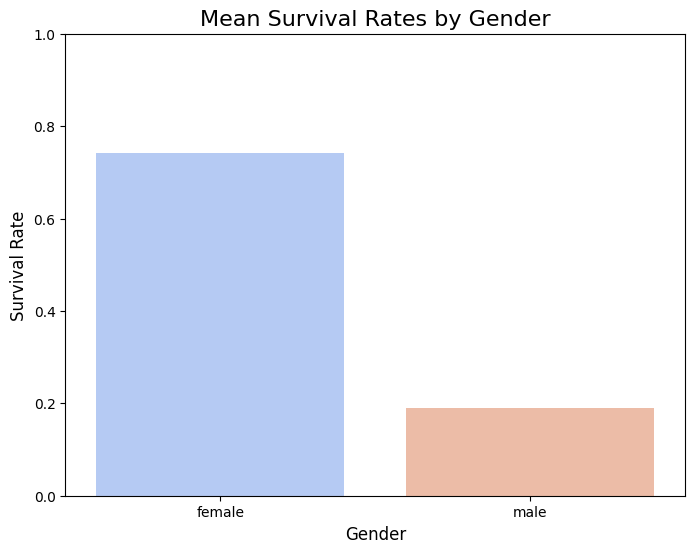

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean survival rates by gender
survival_rates_by_gender = data.groupby('Sex')['Survived'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=survival_rates_by_gender, palette='coolwarm')
plt.title('Mean Survival Rates by Gender', fontsize=16)
plt.ylabel('Survival Rate', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylim(0, 1)
plt.show()


Problem- 5:
 Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

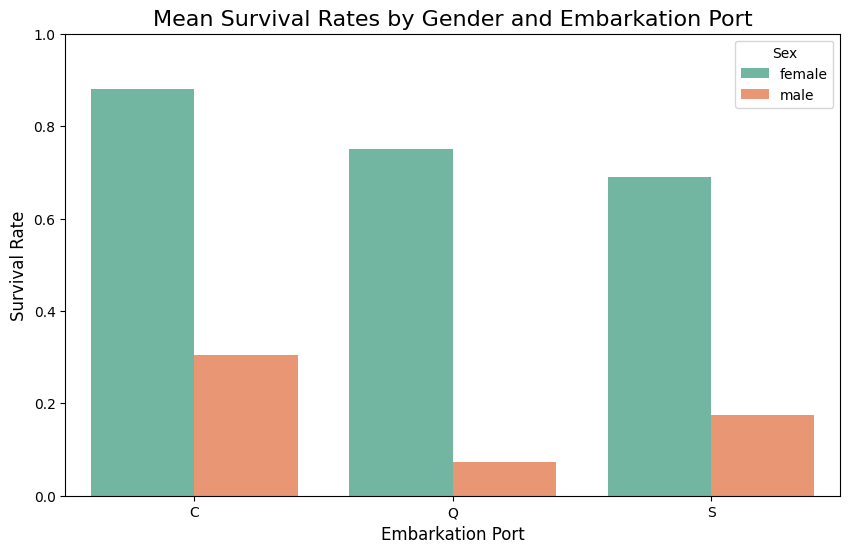

In [21]:
# Calculate survival rates grouped by 'Embarked' and 'Sex'
data['Embarked'] = data[['Embarked_C', 'Embarked_Q', 'Embarked_S']].idxmax(axis=1).str.replace('Embarked_', '')

survival_by_embarkation = data.groupby(['Embarked', 'Sex'])['Survived'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=survival_by_embarkation, palette='Set2')
plt.title('Mean Survival Rates by Gender and Embarkation Port', fontsize=16)
plt.ylabel('Survival Rate', fontsize=12)
plt.xlabel('Embarkation Port', fontsize=12)
plt.ylim(0, 1)
plt.show()


 Problem- 6{Optional}:
 Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
 ’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
 and age group. Draw a visualization using a any plotting library to represent this graphically

<ipython-input-22-b956ba4bc3fe>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class_age = data.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()


Pclass                              1         2         3
AgeGroup                                                 
(0.30000000000000004, 19.0]  0.809524  0.742857  0.333333
(19.0, 25.0]                 0.761905  0.400000  0.197674
(25.0, 31.8]                 0.666667  0.416667  0.283582
(31.8, 41.0]                 0.777778  0.461538  0.166667
(41.0, 80.0]                 0.506667  0.363636  0.088235


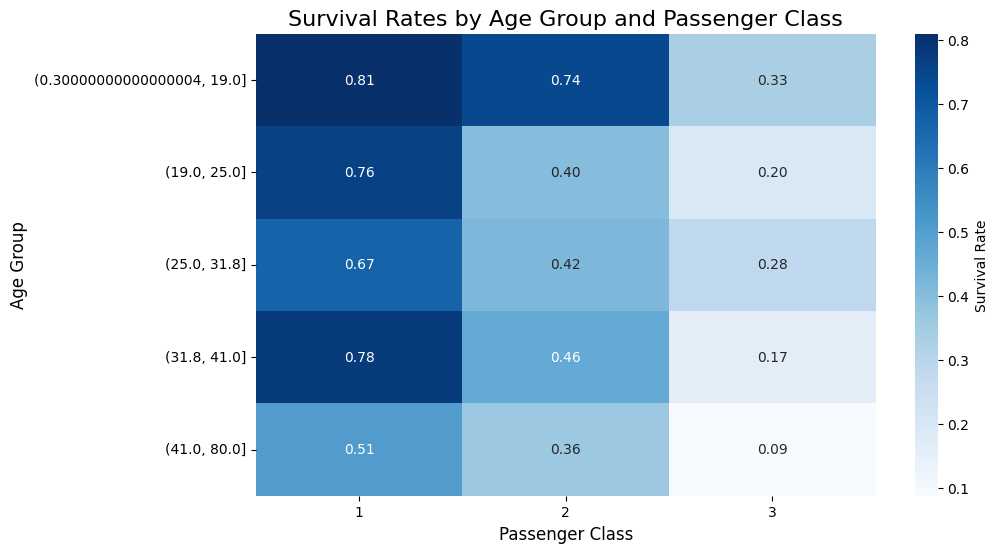

In [22]:
# Divide 'Age' into five quantiles
data['AgeGroup'] = pd.qcut(data['Age'], q=5, precision=1)

# Calculate mean survival rates by 'Pclass' and 'AgeGroup'
survival_by_class_age = data.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()

# Pivot table for easier visualization
survival_pivot = survival_by_class_age.pivot(index='AgeGroup', columns='Pclass', values='Survived')

# Print the pivot table for reference
print(survival_pivot)

# Visualization using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(survival_pivot, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rates by Age Group and Passenger Class', fontsize=16)
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Passenger Class', fontsize=12)
plt.show()
